In [1]:
## Bring in needed mods
import numpy as np, pandas as pd, scipy.stats as ss, glob, seaborn as sns, os
from Bio import SeqIO
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
## Set reference path
refpath = '/home/croth/Documents/DirtyDozen/REF/FungiDB-46_CneoformansH99_Genome.fasta'

## Make a chrom map
chrommap = pd.DataFrame([(i+1,s.id,len(s.seq)) 
                         for i,s in enumerate(
                             SeqIO.parse(refpath,format='fasta'))])
chrommap.columns = ['Chrom','Seqid','Length']

chrommap['Cumpos'] = [0] + chrommap.Length.cumsum().tolist()[:-1]

chrommap['Midpts'] = chrommap.Length/2 + chrommap.Cumpos

## Save and view head
chrommap.to_csv('../../GENOTYPE/H99_chrommap.csv',index=False);
chrommap.head()

,Chrom,Seqid,Length,Cumpos,Midpts
0,1,CP003820.1,2291499,0,1145749.5
1,2,CP003821.1,1621675,2291499,3102336.5
2,3,CP003822.1,1575141,3913174,4700744.5
3,4,CP003823.1,1084805,5488315,6030717.5
4,5,CP003824.1,1814975,6573120,7480607.5


In [3]:
## set path and load in phenotype data
datapath = '../../PHENOTYPE/AMOEBA/HALOS/bt22xftc555_halo_new_parents.csv'

## Load data view head
data = pd.read_csv(datapath)
data.head()

,PMY,Replicate,Halo,Z
0,PMY2649,1,6.904,0
1,PMY2649,2,4.097,0
2,PMY2649,3,7.451,0
3,PMY2649,1,7.280,1
4,PMY2649,2,6.854,1


In [4]:
## Set parent names and gather PMY numbers
parents = ['Bt22','Ftc555-1']
#parentdf = data[(data.Strain.isin(parents))][['Strain','PMY']].drop_duplicates()

parent_pmy = sorted(data.PMY.unique().tolist())
parent_pmy

['PMY2649', 'PMY2650']

In [15]:
## Genotype data
genodata = sorted(glob.glob('../../GENOTYPE/CSV/GT/CP0038*_genotypes.csv.gz'))

## Check work
assert len(genodata) >= 14

## Take variants for use in QTL mapping
genodata = sorted([g for g in genodata if len(g.split('QTL')) == 1])

## Print length
len(genodata)

15

In [36]:
## bring in data for each chromosome (except mitochondira)
gts = []
dps = []
ars = []
info = []
startpath = '../../GENOTYPE/CSV'
for i,g in enumerate(genodata[:-1]):
    
    seqid = g.split('/')[-1].split('_')[0]    
    gts.append(pd.read_csv(g,index_col=0))
    
    infopath = '%s/INFO/%s_info_cols.csv.gz'%(startpath,seqid)
    info.append(pd.read_csv(infopath,index_col=0))
    
    depthpath = '%s/DP/%s_depths.csv.gz'%(startpath,seqid)
    dps.append(pd.read_csv(depthpath,index_col=0))
    
    ratiopath = '%s/AF/%s_allele_ratios.csv.gz'%(startpath,seqid)
    ars.append(pd.read_csv(ratiopath,index_col=0))
    
gts = pd.concat(gts,axis=0)
info = pd.concat(info,axis=0)
dps = pd.concat(dps,axis=0)
ars = pd.concat(ars,axis=0)

In [38]:
info

,Seqid,Pos,Qual,Nalleles,Alleles,Maxlen,Minlen,Type,Callrate,MAF
1,CP003820.1,24690,145621.000000,2,GATAAAAG.GATGAAAG.AATAAAAG,8,8,MNP,0.973958,0.005208
2,CP003820.1,24693,77857.400000,1,A.G,1,1,SNP,0.973958,0.471354
3,CP003820.1,24694,0.016921,1,AAAG.GACA,4,4,MNP,0.973958,0.971354
4,CP003820.1,24699,67366.000000,1,T.C,1,1,SNP,0.976562,0.505208
5,CP003820.1,25980,162643.000000,1,C.T,1,1,SNP,0.992188,0.484375
...,...,...,...,...,...,...,...,...,...,...
4076,CP003833.2,928768,77949.500000,1,C.G,1,1,SNP,0.997396,0.591146
4078,CP003833.2,928770,2645.160000,1,ATC.GTA,3,3,MNP,1.000000,0.997396
4079,CP003833.2,928776,31469.900000,1,G.A,1,1,SNP,1.000000,0.789062
4081,CP003833.2,932142,115898.000000,4,CGAGAAAAGAACTGGGCC.CGAGAAAAGAACTGGACC.CAAGAAAA...,18,18,MNP,0.921875,0.010417


In [34]:
gts

,PMY2936,PMY2934,PMY2932,PMY2931,PMY2929,PMY2927,PMY2925,PMY2924,PMY2923,PMY2919,...,PMY2837,PMY2783,PMY2784,PMY2661,PMY2793,PMY2926,PMY2803,PMY2807,PMY2808,PMY2810
1,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4079,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4081,1.0,1.0,1.0,NaN,2.0,1.0,1.0,1.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0


In [16]:

    
    infodf = pd.read_csv(infopath,index_col=0)
    genodf = pd.read_csv(g,index_col=0)
    
    chromdf = pd.concat([infodf,genodf],axis=1)
    chromdf['Chrom'] = i + 1
    genotypes.append(chromdf)
    
## Concatonate results
geno = pd.concat(genotypes,axis=0).reset_index(drop=True)

## show head
geno.head()

,Seqid,Pos,Qual,Nalleles,Alleles,Maxlen,Minlen,Type,Callrate,MAF,...,PMY2783,PMY2784,PMY2661,PMY2793,PMY2926,PMY2803,PMY2807,PMY2808,PMY2810,Chrom
0,CP003820.1,24690,145621.000000,2,GATAAAAG.GATGAAAG.AATAAAAG,8,8,MNP,0.973958,0.005208,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1
1,CP003820.1,24693,77857.400000,1,A.G,1,1,SNP,0.973958,0.471354,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1
2,CP003820.1,24694,0.016921,1,AAAG.GACA,4,4,MNP,0.973958,0.971354,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,CP003820.1,24699,67366.000000,1,T.C,1,1,SNP,0.976562,0.505208,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4,CP003820.1,25980,162643.000000,1,C.T,1,1,SNP,0.992188,0.484375,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1


In [19]:
## Check our work
assert len(geno.Chrom.unique()) >= 14

## Raw how many called variants are there?
geno.shape

(59358, 395)

In [22]:
## Set path to depth dataframes
depthdata_path = sorted(glob.glob('../../GENOTYPE/CSV/DP/CP0038*_depths.csv.gz'))
assert len(depthdata_path) >= 14

## Load in and concatonate depth dataframes
depths = []
for i,g in enumerate(genodata):
    
    seqid = g.split('/')[-1].split('_')[0]
    depthpath = '../../GENOTYPE/CSV/DP/%s_depths.csv.gz'%seqid
    assert depthpath in depthdata_path
    infopath = '../../GENOTYPE/CSV/INFO/%s_info_cols.csv.gz'%seqid
    
    infodf = pd.read_csv(infopath,index_col=0)
    dpdf = pd.read_csv(depthpath,index_col=0)
    
    chromdf = pd.concat([infodf,dpdf],axis=1)
    chromdf['Chrom'] = i+1
    depths.append(chromdf)
    
depth = pd.concat(depths,axis=0).reset_index(drop=True)
depth.head()

,Seqid,Pos,Qual,Nalleles,Alleles,Maxlen,Minlen,Type,Callrate,MAF,...,PMY2783,PMY2784,PMY2661,PMY2793,PMY2926,PMY2803,PMY2807,PMY2808,PMY2810,Chrom
0,CP003820.1,24690,145621.000000,2,GATAAAAG.GATGAAAG.AATAAAAG,8,8,MNP,0.973958,0.005208,...,27.0,16.0,27.0,29.0,12.0,18.0,12.0,16.0,16.0,1
1,CP003820.1,24693,77857.400000,1,A.G,1,1,SNP,0.973958,0.471354,...,27.0,18.0,29.0,29.0,14.0,19.0,12.0,16.0,17.0,1
2,CP003820.1,24694,0.016921,1,AAAG.GACA,4,4,MNP,0.973958,0.971354,...,27.0,18.0,27.0,29.0,14.0,18.0,12.0,16.0,16.0,1
3,CP003820.1,24699,67366.000000,1,T.C,1,1,SNP,0.976562,0.505208,...,27.0,18.0,28.0,29.0,13.0,18.0,11.0,16.0,17.0,1
4,CP003820.1,25980,162643.000000,1,C.T,1,1,SNP,0.992188,0.484375,...,39.0,25.0,48.0,51.0,24.0,56.0,22.0,24.0,24.0,1


In [9]:
## Set allelic ratios paths
allelic_ratio_paths = sorted(glob.glob('../../GENOTYPE/CSV/AF/CP0038*_allele_ratios.csv.gz'))
assert len(allelic_ratio_paths) >= 14

## load and concatinate data
allelic_ratio = []
for i,g in enumerate(allelic_ratio_paths[:-1]):
    
    seqid = g.split('/')[-1].split('_')[0]
    
    infopath = '../../GENOTYPE/CSV/INFO/%s_info_cols.csv.gz'%seqid
    
    infodf = pd.read_csv(infopath,index_col=0)
    genodf = pd.read_csv(g,index_col=0)
    
    chromdf = pd.concat([infodf,genodf],axis=1)
    chromdf['Chrom'] = i+1
    allelic_ratio.append(chromdf)
    
ardf = pd.concat(allelic_ratio,axis=0).reset_index(drop=True)
ardf.head()

,Seqid,Pos,Qual,Callrate,Nallele,Alleles,Maxlen,Minlen,Depth,Type,...,PMY2783,PMY2784,PMY2661,PMY2793,PMY2926,PMY2803,PMY2807,PMY2808,PMY2810,Chrom
0,CP003820.1,24689,1.521830e-12,0.973958,1,T.C,1,1,4790,snp,...,0.931034,0.944444,0.966667,0.966667,0.923077,0.952381,0.941176,0.941176,0.947368,1
1,CP003820.1,24690,1.456210e+05,0.973958,2,GATAAAAG.GATGAAAG.AATAAAAG,8,8,4527,snp,...,0.928571,0.941176,0.964286,0.966667,0.769231,0.947368,0.923077,0.882353,0.941176,1
2,CP003820.1,24693,7.785740e+04,0.973958,1,A.G,1,1,4727,snp,...,0.928571,0.947368,0.966667,0.966667,0.800000,0.950000,0.923077,0.882353,0.944444,1
3,CP003820.1,24694,1.692120e-02,0.973958,1,AAAG.GACA,4,4,4633,complex,...,0.964286,0.947368,0.964286,0.966667,0.933333,0.947368,0.923077,0.941176,0.941176,1
4,CP003820.1,24699,6.736600e+04,0.976562,1,T.C,1,1,4572,snp,...,0.928571,0.947368,0.965517,0.966667,0.785714,0.947368,0.916667,0.882353,0.944444,1


In [10]:
## Take the smaples
samples = [s for s in geno.columns if s[:3]=='PMY']
len(samples)

384

In [11]:
## calculate the H99 allele frequency
geno['H99_allele'] = (geno[samples] > 0).T.sum()/len(samples)

## Find index were parental strains are different from each other
parent_diff_ix = geno[(geno[parent_pmy].diff(axis=1).abs()[parent_pmy[-1]] !=0)][parent_pmy].dropna().index

## Take these data
genodf = geno.loc[parent_diff_ix,:]

## How many?
genodf.shape

(51906, 396)

In [12]:
## Recode alleles to be Bt22 or Ftc555-1
## Copy dataframe
genodfc = genodf.copy()

for s in samples:
    genodfc[s] = -1
    
## Recode samples 
for s in samples:
    
    if s in parent_pmy:        
        continue
    
    bt22ix = (genodf[s] == genodf[parent_pmy[0]]) ## Bt22
    ftc555ix = (genodf[s] == genodf[parent_pmy[1]]) ## Ftc555-1
    #otherix = genodf[~((bt22ix) | (ftc555ix))].index.tolist()
    
    genodfc.loc[bt22ix,s] = 0 ## Bt22 allele
    genodfc.loc[ftc555ix,s] = 1 ## Ftc555-1 alele
    #genodfc.loc[otherix,s] = -1 ## others
## recode parents    
for i,s in enumerate(parent_pmy):

    genodfc[s] = i

In [13]:
## This is called denovo b/c it isn't the parental allele
## Really these are missing loci or loci not from the two parens
denovo = pd.DataFrame((genodfc[samples] == -1).sum(axis=0),columns = ['Denovo'])
denovo = denovo.sort_values('Denovo')
denovo[(denovo.Denovo>10000)]

,Denovo
PMY2633,12202
PMY2589,13462
PMY2585,14641
PMY2829,17220
PMY2763,19083
PMY2587,19502
PMY2600,30792
PMY2741,49664


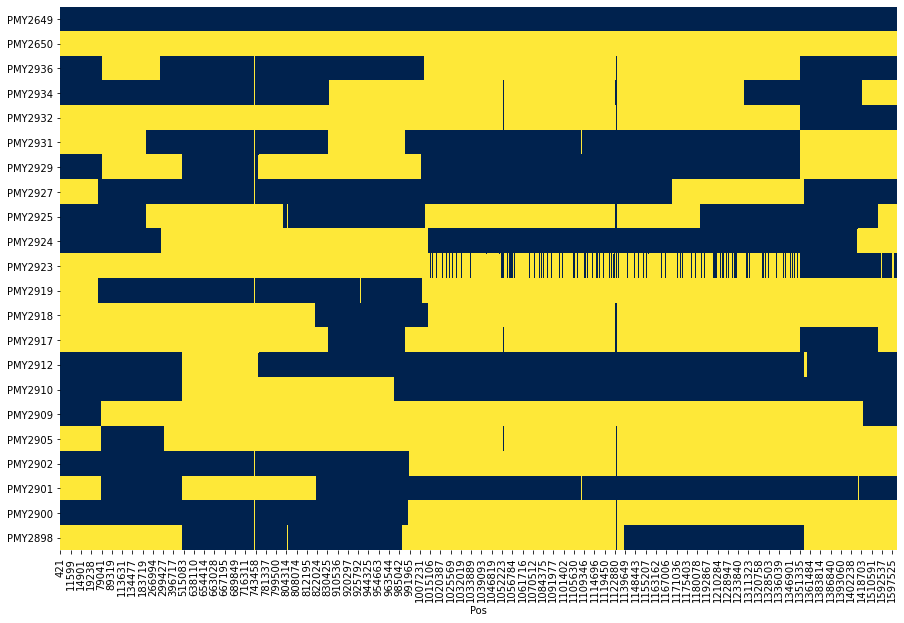

In [14]:
## For a few segregants, plot the genotypes of a chromosome
## for chromosome 2
ns = 20
parentdf = genodfc[(genodfc.Chrom==2) ][['Pos']+parent_pmy+samples[:ns]]
parentdf.index = parentdf.Pos
parentdf.drop('Pos',axis=1,inplace=True)
fig,ax = plt.subplots(1,1,figsize=(15,10))

sns.heatmap(parentdf.replace(-1,np.nan).T,
            cmap='cividis',cbar=False,vmax=1,vmin=0);

In [15]:
## Per loci how many samples have data
genodfc['OA'] = (genodfc[samples] > -1).sum(axis=1)

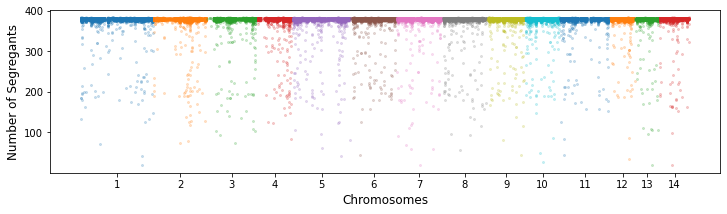

In [16]:
## plot the number of markers called in progeny across the genome
fig,ax = plt.subplots(1,1,figsize=(12,3))

for i,j in chrommap.iterrows():
    
    temp = genodfc[(genodfc.Seqid == j.Seqid)]
    cumpos = j.Cumpos
    
    plt.plot(temp.Pos.values+cumpos,temp.OA.values,
             '.',markersize=4,alpha=0.2);
plt.xticks(chrommap.Midpts[:-1],chrommap.index.values[:-1]+1);

plt.ylabel('Number of Segregants',fontsize=12)
plt.xlabel('Chromosomes',fontsize=12);

In [17]:
## For each segregant 
## make diagnostic plots showing
## 1) the depth across the genome
## 2) the allelic ratio per site
for soi in samples:
    save_path = '../../FIGURES/Progeny/%s_depthplot.png'%soi
    
    if os.path.exists(save_path):
        continue
        
    fig,ax = plt.subplots(2,1,figsize=(12,3),sharex=True)
    plt.sca(ax[0])
    for i,j in chrommap.iterrows():
        temp = depth[(depth.Chrom==j.Chrom)]
        cumpos = j.Cumpos
        plt.plot(temp.Pos+cumpos,np.log10(temp[soi].values+1),
                 '.',markersize=2,alpha=0.2);
    plt.hlines(np.log10(10),0,19*10**6,color='k',linestyle='--')
    plt.ylabel('log$_{10}$ (depth)')
    plt.sca(ax[1])
    for i,j in chrommap.iterrows():
        temp = ardf[(ardf.Chrom==j.Chrom)][[soi,'Pos']]
        cumpos = j.Cumpos
    
        plt.plot(temp.Pos+cumpos,temp[soi].values,'.',
                 markersize=2,alpha=0.2);
    
    plt.xticks(chrommap.Midpts[:-1],chrommap.index.values[:-1]+1);
    plt.xlabel('Chromosome');plt.ylabel('Allelic Ratio');
    plt.savefig(save_path,dpi=100,bbox_inches='tight');
    plt.close()

In [18]:
## This analysis above revealed a strain with aneiuplody
aneuploidy = ['PMY2923']

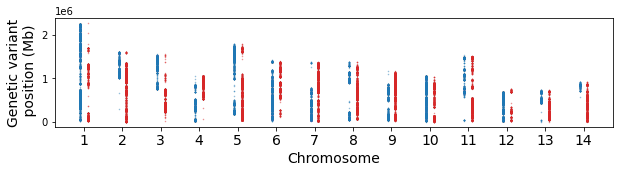

In [19]:
## Douple check our discovery above
## Gather the strain that is potentually an aneuploid
soi = aneuploidy[0]
## Make into a dataframe and plot
oldfchrom = genodfc[aneuploidy+['Pos','Chrom']].copy()

fig,ax = plt.subplots(1,1,figsize=(10,2))
for i,j in chrommap[:-1].iterrows():
    
    oldf = oldfchrom[(oldfchrom.Chrom==i+1)]
    plt.plot(i*np.ones(len(oldf[(oldf[soi]==0)].Pos.values)) -0.1, 
             oldf[(oldf[soi]==0)].Pos.values,
                '.',color='tab:blue',ms=1,alpha=0.5)
    
    plt.plot(i*np.ones(len(oldf[(oldf[soi]==1)].Pos.values)) + 0.1, 
             oldf[(oldf[soi]==1)].Pos.values,
                '.',color='tab:red',ms=1,alpha=0.5)
    
plt.xticks(np.arange(14),np.arange(14)+1,fontsize=14);
plt.xlabel('Chromosome',fontsize=14)
plt.ylabel('Genetic variant\n position (Mb)',fontsize=14);

In [20]:
## Calculate the average depth, 
## allelic read depth, 
## and number of miss called alleles per segregant
average_df = pd.DataFrame([depth[samples].median(axis=0),
                           ardf[samples].median(axis=0),
                           (genodfc[samples] == -1).sum()]).T
average_df.columns = ['DP','AR','MI'];
average_df.to_csv('../../NOTES/Depth_by_sample.csv',index=True)

In [21]:
## Make bins of read depth
bins = np.arange(0,40,5)
bins = list(zip(bins[:-1],bins[1:])) + [(35,200)]
bins 

## Make labels for these bins
binlabels = ['-'.join([str(k) if i ==0 else str(k-1) for i,k in enumerate(b)]) for b in bins[:-1]] + ['>35']
binlabels

['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '>35']

In [22]:
## Calculate counts per bin
dp_counts = [average_df[(average_df.DP.isin(np.arange(*b)))].shape[0] 
             for b in bins]
dp_counts,np.sum(dp_counts)

([13, 27, 53, 57, 56, 49, 36, 93], 384)

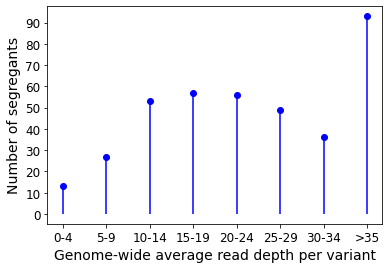

In [23]:
## Plot histogram of coverage across segregants
[plt.vlines(i,0,c,color='b') for i,c in enumerate(dp_counts)];
[plt.plot(i,c,'bo') for i,c in enumerate(dp_counts)];
plt.xticks(np.arange(len(bins)),binlabels,fontsize=12);
plt.yticks(np.arange(0,100,10),fontsize=12);
plt.xlabel('Genome-wide average read depth per variant',
           fontsize=14);
plt.ylabel('Number of segregants',fontsize=14);
plt.savefig('../../FIGURES/Coverage_and_segregants.png',
            dpi=150,bbox_inches='tight');

In [24]:
## Make bins for number of missing markers
mibins = np.arange(0,1200,200)
mibins = list(zip(mibins[:-1],mibins[1:])) + [(1000,200000)]
mibins

[(0, 200), (200, 400), (400, 600), (600, 800), (800, 1000), (1000, 200000)]

In [25]:
## Make lables for these bins
mibinlabels = ['-'.join([str(k) if i ==0 else str(k-1) for i,k in enumerate(b)]) for b in mibins[:-1]] + ['>1000']
mibinlabels

['0-199', '200-399', '400-599', '600-799', '800-999', '>1000']

In [26]:
## Calculate counts per bin for missing data
mi_counts = [average_df[(average_df.MI.isin(np.arange(*b)))].shape[0] 
             for b in mibins]
mi_counts

[2, 322, 27, 8, 1, 24]

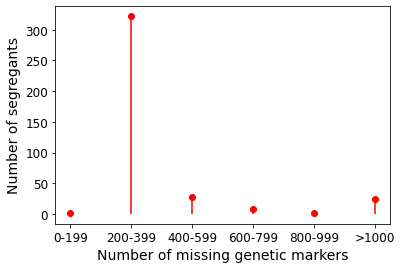

In [27]:
## Plot histogram of missing loci per progny
[plt.vlines(i,0,c,color='r') for i,c in enumerate(mi_counts)];
[plt.plot(i,c,'ro') for i,c in enumerate(mi_counts)];
plt.xticks(np.arange(len(mibins)),mibinlabels,fontsize=12);
plt.yticks(fontsize=12);
plt.xlabel('Number of missing genetic markers',
           fontsize=14);
plt.ylabel('Number of segregants',fontsize=14);
plt.savefig('../../FIGURES/Missing_variants_and_segregants.png',
            dpi=150,bbox_inches='tight');

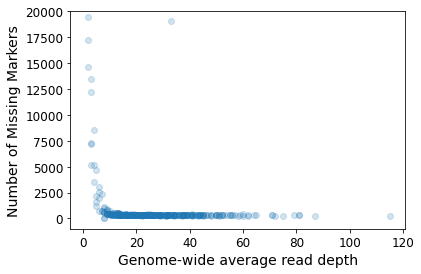

In [28]:
## Plot these data againts eachother to see relationship
## There is a strain that looks like a diploid here
plt.plot(average_df.DP,average_df.MI,
         'o',alpha=0.2);
plt.ylabel('Number of Missing Markers',
           fontsize=14);
plt.xlabel('Genome-wide average read depth',
           fontsize=14);
plt.xticks(fontsize=12);plt.yticks(fontsize=12)
plt.ylim(-1000,20000);

['PMY2763']


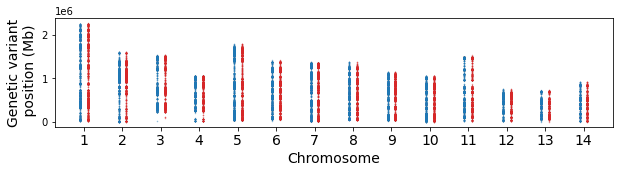

In [29]:
## Gather this diploid
## In figure obove we see one outlier, investigate
outlier = average_df[(average_df.DP<40) & 
                     (average_df.DP>20) & 
                     (average_df.MI>10000)].index.tolist()
print(outlier)
## Make into a dataframe and plot
oldfchrom = genodfc[outlier+['Pos','Chrom']].copy()

fig,ax = plt.subplots(1,1,figsize=(10,2))
for i,j in chrommap[:-1].iterrows():
    
    oldf = oldfchrom[(oldfchrom.Chrom==i+1)]
    plt.plot(i*np.ones(len(oldf[(oldf[outlier[0]]==0)].Pos.values)) -0.1, 
              
             oldf[(oldf[outlier[0]]==0)].Pos.values,
                '.',color='tab:blue',ms=1,alpha=0.5)
    
    plt.plot(i*np.ones(len(oldf[(oldf[outlier[0]]==1)].Pos.values)) + 0.1, 
              
             oldf[(oldf[outlier[0]]==1)].Pos.values,
                '.',color='tab:red',ms=1,alpha=0.5)
plt.xticks(np.arange(14),np.arange(14)+1,fontsize=14);
plt.xlabel('Chromosome',fontsize=14)
plt.ylabel('Genetic variant\n position (Mb)',fontsize=14)
## Analysis of this strain makes 
## me think its a heterozygotic diploid
diploids = outlier

In [30]:
## Find dataframe of potential mapping populations
## Take samples with average greater than 9 X
## and less than 600 missing loci
mapping_pop_stats = average_df[(average_df.DP>7) & (average_df.MI<600)]

## Check work, this train should not be in this index
assert not diploids[0] in mapping_pop_stats.index

In [31]:
## Take just the segregants and how many are there?
mapping_pop = [s for s in
               mapping_pop_stats.index.tolist() 
               if s not in aneuploidy+diploids]

len(mapping_pop)

350

In [32]:
## Are our parents in the mapping pop?
[p in mapping_pop for p in parent_pmy]

[True, True]

In [33]:
average_df.loc[parent_pmy]

,DP,AR,MI
PMY2649,8.0,0.888889,0.0
PMY2650,8.0,0.888889,0.0


In [34]:
## How many total loci of the Mapping pop 
## are we going to drop because they have data with 
## missing value?
(genodfc[mapping_pop].min(axis=1) == -1).sum()

5470

In [35]:
## Take unique loci after temporarely dropping the above
uloci = genodfc[~(genodfc[mapping_pop].min(axis=1) == -1)][
                            mapping_pop].drop_duplicates()
uloci.shape

(5061, 350)

In [36]:
## Calculate genotypic corrilations between strains
clone_ranks = []
ht = 0.5

## Take just progeny
map_prog = [p for p in mapping_pop if p not in parent_pmy]

for i,s in enumerate(map_prog):
    for j,k in enumerate(map_prog):
        if j>i:
            s1 = uloci[s].values
            s2 = uloci[k].values
            
            p = ss.spearmanr(s1,s2)[0]
            if p > ht:
                clone_ranks.append((p,s,k))
            else:
                pass
        else:
            pass

## Make paired strain corrilations into a dataframe
clonerank = pd.DataFrame(clone_ranks,
                         columns = ['p','s1','s2']
                        ).sort_values('p')
clonerank.head()

,p,s1,s2
2,0.962233,PMY2872,PMY2866
29,0.969706,PMY2568,PMY2597
44,0.970835,PMY2703,PMY2705
47,0.976453,PMY2714,PMY2705
40,0.976944,PMY2708,PMY2706


In [37]:
## How many ranks are above 50% and what is the corrilations
clonerank[(clonerank.p>0.50)].shape[0],clonerank[(clonerank.p>0.50)].p.min()

(50, 0.9622333150884016)

In [38]:
## Gather the unique strains that are clones
unique_clones = list(sorted(np.unique(clonerank.s1.tolist() + clonerank.s2.tolist())))
len(unique_clones)

80

In [39]:
## Sort the clones by strain
clones_sorted = pd.DataFrame([[j.p] + list(sorted(j[['s1','s2']])) 
                              for i,j in clonerank.iterrows()],
                             columns=clonerank.columns).sort_values('s1')
clones_sorted.head()

,p,s1,s2
24,0.984739,PMY2556,PMY2557
41,0.989276,PMY2556,PMY2566
27,0.985559,PMY2556,PMY2574
23,0.984738,PMY2557,PMY2566
12,0.981021,PMY2557,PMY2574


In [40]:
## Group the clones
clones_grouped = []

for s in unique_clones:
    sub = clones_sorted[(clones_sorted.s1==s)].s2.tolist() + [s]
    group = np.unique(np.concatenate(
                clones_sorted[
                (clones_sorted.s1.isin(sub)) | 
                (clones_sorted.s2.isin(sub))
                ][['s1','s2']].values))
    
    clones_grouped.append(group)
    
## make into dataframe 
cg = pd.DataFrame(clones_grouped,
                  columns=['s1','s2','s3','s4']
                 ).sort_values('s1')

## Drop the duplicate clone groups
clone_groups = cg.drop_duplicates().reset_index(drop=True)

## save
clone_groups.to_csv('../../NOTES/Clone_strains.csv',
                    index=False)

## View head
clone_groups.head()

,s1,s2,s3,s4
0,PMY2556,PMY2557,PMY2566,PMY2574
1,PMY2559,PMY2577,None,None
2,PMY2560,PMY2562,PMY2595,None
3,PMY2564,PMY2579,None,None
4,PMY2568,PMY2597,None,None


In [41]:
## How many unique groups of clones are there?
clone_groups.shape

(37, 4)

In [42]:
## We are losing this number of strains b/c they are clones
len(unique_clones) - clone_groups.shape[0]

43

In [43]:
## Should be same as above, but calculated differently
clones_drop = [s for s in 
               np.concatenate(
                   clone_groups[['s2','s3','s4']].values) 
               if s is not None]
len(clones_drop)

43

In [44]:
## Gather strains for use in mapping population
mapping_pop_nc = [s for s in mapping_pop 
                  if s not in clones_drop+aneuploidy+diploids+['PMY2900']] + ['PMY2902']
len(mapping_pop_nc)

307

In [45]:
## Gather markers for these non-clonal segregants
markers = genodfc.loc[~(genodfc[mapping_pop_nc].min(axis=1) == -1)].copy()

## Calculate allele frequency of Bt22
markers['Allele_frequency'] = markers[mapping_pop_nc].mean(axis=1)

## Take those between 0.4 and 0.6
miaf = 0.4
maaf = 0.6
loci = markers[(markers.Allele_frequency>miaf) & 
               (markers.Allele_frequency<=maaf)].copy()
loci.shape

(46888, 398)

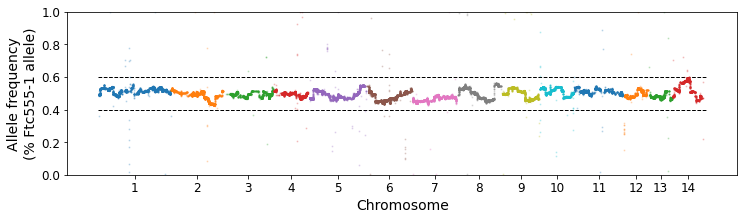

In [46]:
## Plot the allele frequencies of Ftc555-1
fig,ax = plt.subplots(1,1,figsize=(12,3))

for i,j in chrommap.iterrows():
    
    temp = markers[(markers.Seqid == j.Seqid)]
    cumpos = j.Cumpos
    
    plt.plot(temp.Pos.values+cumpos,temp.Allele_frequency.values,
             '.',markersize=2,alpha=0.2);
plt.ylim(0,1);
plt.xticks(chrommap.Midpts[:-1],chrommap.Chrom[:-1],fontsize=12);
plt.yticks(fontsize=12)
plt.xlabel('Chromosome',fontsize=14)
plt.ylabel('Allele frequency\n(% Ftc555-1 allele)',fontsize=14)
plt.hlines((miaf,maaf),0,19*10**6,
           linestyle='--',color='k',linewidth=1);
plt.savefig('../../FIGURES/Allele_frequencies.png',
            dpi=100,bbox_inches='tight');

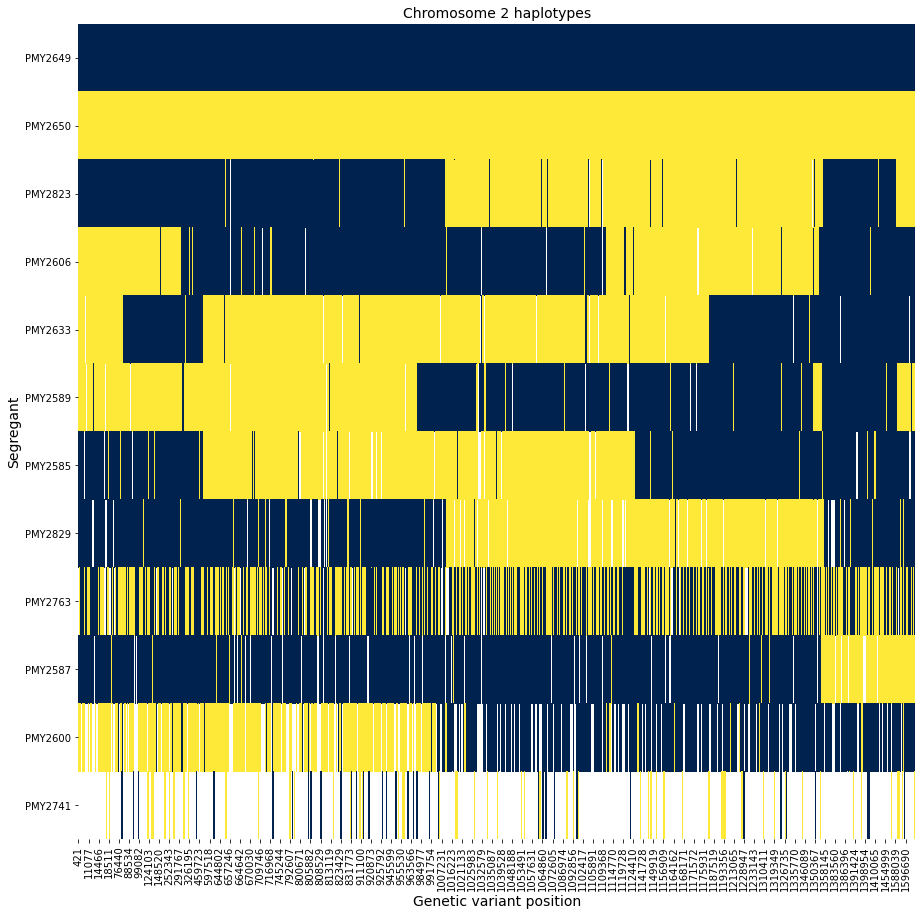

In [47]:
## Plot segregatns with many missing values
## for chromsome 2
chrom = 2
to_plot = denovo.index.tolist()[-10:]
parentdf = loci[(loci.Chrom==chrom)][['Pos']+parent_pmy+to_plot]
parentdf.index = parentdf.Pos

fig,ax = plt.subplots(1,1,figsize=(15,15))

sns.heatmap(parentdf[parent_pmy+to_plot].replace(-1,np.nan).T,
            cmap='cividis',cbar=False,vmin=0,vmax=1);
plt.yticks(rotation=0);
plt.ylabel('Segregant',fontsize=14);
plt.xlabel('Genetic variant position',fontsize=14)
plt.title('Chromosome %s haplotypes'%chrom,fontsize=14)
plt.savefig('../../FIGURES/Chromosome_%s_bad_genotypes.png'%chrom,
            dpi=100,bbox_inches='tight')

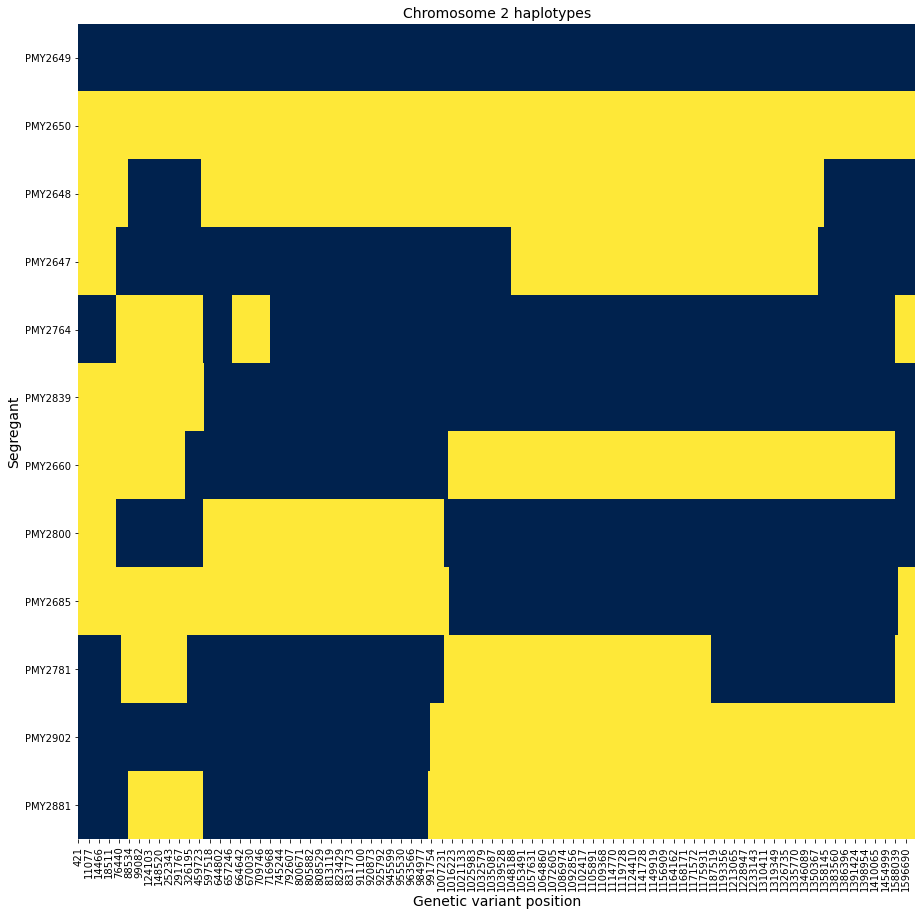

In [48]:
## Plot segregants with good read depth
## for chromosome 2
chrom = 2
to_plot = average_df[(average_df.index.isin(mapping_pop_nc))].sort_values('DP').index.tolist()[-10:]
parentdf = loci[(loci.Chrom==chrom)][['Pos']+parent_pmy+to_plot]
parentdf.index = parentdf.Pos

fig,ax = plt.subplots(1,1,figsize=(15,15))

sns.heatmap(parentdf[parent_pmy+to_plot].replace(-1,np.nan).T,
            cmap='cividis',cbar=False,vmin=0,vmax=1);
plt.yticks(rotation=0);
plt.ylabel('Segregant',fontsize=14);
plt.xlabel('Genetic variant position',fontsize=14)
plt.title('Chromosome %s haplotypes'%chrom,fontsize=14)
plt.savefig('../../FIGURES/Chromosome_%s_good_genotypes.png'%chrom,
            dpi=100,bbox_inches='tight');

In [49]:
## Re-calculate the new depth with mapping populaiton
loci['Depth'] = depth.loc[loci.index,mapping_pop_nc].sum(axis=1)

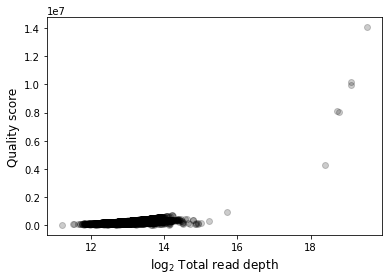

In [50]:
## Examine Quailty scores as ftn of read depth
plt.plot(np.log2(loci.Depth),loci.Qual,'ko',alpha=0.2);
plt.xlabel('log$_{2}$ Total read depth',fontsize=12)
plt.ylabel('Quality score',fontsize=12);

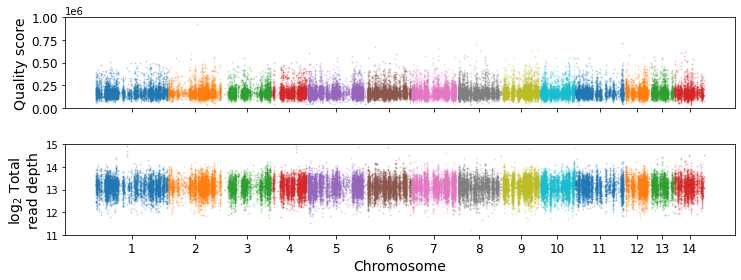

In [51]:
## Show quality and read depth acros genome
fig,ax = plt.subplots(2,1,figsize=(12,4),
                      sharex=True,sharey=False)
plt.sca(ax[0])
for i,j in chrommap.iterrows():
    
    temp = loci[(loci.Seqid == j.Seqid)]
    cumpos = j.Cumpos
    plt.plot(temp.Pos.values+cumpos,temp.Qual.values,
             '.',markersize=2,alpha=0.2);
    
plt.ylim(0,10**6)
plt.yticks(fontsize=12)
plt.ylabel('Quality score',fontsize=14)

plt.sca(ax[1])
for i,j in chrommap.iterrows():
    
    temp = loci[(loci.Seqid == j.Seqid)]
    cumpos = j.Cumpos
    plt.plot(temp.Pos.values+cumpos,
             np.log2(temp.Depth.values),
             '.',markersize=2,alpha=0.2);
    
plt.ylabel('log$_{2}$ Total\nread depth',
           fontsize=14)
plt.xlabel('Chromosome',fontsize=14)
plt.xticks(chrommap.Midpts[:-1],
           chrommap.Chrom[:-1],
           fontsize=12);
plt.ylim(11,15)
plt.subplots_adjust(hspace=0.4)

plt.savefig('../../FIGURES/Quality_scores_read_depth.png',
            dpi=100,bbox_inches='tight');

In [52]:
## How many loic have high read depth and quality scores?
loci[(loci.Depth>=2**14.5)].shape[0]

23

In [53]:
## Filter on total depth (and subsequencly quality score)
loci_qual = loci[(loci.Depth<2**14.5)]
loci_qual.shape[0]

46865

In [54]:
## How many of these sites are unique?
loci_qual[mapping_pop_nc].drop_duplicates().shape

(4797, 307)

In [55]:
## calculate inter marker intervals (IMI)
imi = []

## per chormosome
for i,j in chrommap[:-1].iterrows():
    temp = loci_qual[(loci_qual.Chrom==j.Chrom)].sort_values('Pos')
    chimi = temp.Pos.diff().dropna().values - 1
    imi.append(chimi)

## concatenate
imi = pd.Series(np.concatenate(imi))

In [56]:
## What is the maximum IMI?
imi.max()

66044.0

In [57]:
## set bins for looking at imi
imid = [0,100,500,1000,5000]
## zip and list together
imibins = list(zip(imid[:-1],imid[1:])) + [(np.max(imid),100000)]

## Make bin labesl 
imibinlabels = ['-'.join([str(k) if i ==0 else str(k-1) 
                          for i,k in enumerate(b)]) 
                for b in imibins[:-1]] + ['>5000']
imibinlabels

['0-99', '100-499', '500-999', '1000-4999', '>5000']

In [58]:
## calculate IMI distribution
imi_counts = np.array([imi.isin(np.arange(*b)).sum() 
                       for b in imibins])

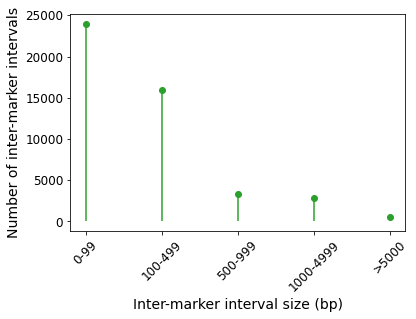

In [59]:
## Show IMI distribution
## Plot histogram of coverage across segregants
[plt.vlines(i,0,c,color='tab:green') 
 for i,c in enumerate(imi_counts)];
[plt.plot(i,c,'o',color='tab:green') 
 for i,c in enumerate(imi_counts)];

plt.xticks(np.arange(len(imibins)),
           imibinlabels,fontsize=12,rotation=45);
plt.yticks(fontsize=12);
plt.xlabel('Inter-marker interval size (bp)',
           fontsize=14);
plt.ylabel('Number of inter-marker intervals',
           fontsize=14);
plt.savefig('../../FIGURES/Inter-marker_interval_dist.png',
            dpi=150,bbox_inches='tight');

In [60]:
## What is the median IMI?
np.median(imi.values)

94.0

In [61]:
## Append counts to chromosome length dataframe
loci_counts = chrommap.merge(loci_qual.groupby('Chrom').count()[['Depth']].reset_index())
loci_counts.columns = loci_counts.columns.tolist()[:-1] + ['Variant_counts']
loci_counts.head()

,Chrom,Seqid,Length,Cumpos,Midpts,Variant_counts
0,1,CP003820.1,2291499,0,1145749.5,5061
1,2,CP003821.1,1621675,2291499,3102336.5,3644
2,3,CP003822.1,1575141,3913174,4700744.5,2851
3,4,CP003823.1,1084805,5488315,6030717.5,2673
4,5,CP003824.1,1814975,6573120,7480607.5,4757


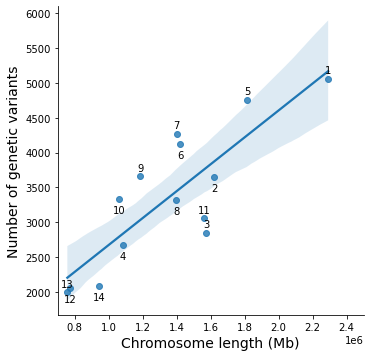

In [62]:
## plot number of genetic variants as ftn of chromosome size
sns.lmplot(x='Length',y='Variant_counts',data=loci_counts);
plt.xlim(7.0*10**5,2.5*10**6);
plt.xlabel('Chromosome length (Mb)',fontsize=14)
plt.ylabel('Number of genetic variants',fontsize=14);

for i,j in loci_counts.iterrows():
    
    plt.text(j.Length,j.Variant_counts+(50 if i%2==0 else -90),j.Chrom,
             ha='center',va='bottom' if i%2 ==0 else 'top')
plt.savefig('../../FIGURES/Variants_chromosome_size.png',
            dpi=100,bbox_inches='tight');

In [63]:
## How many sites do we have?
loci_qual.shape

(46865, 398)

In [64]:
## There appear to be duplicates SNPs in these data
loci_uni = loci_qual[['Chrom','Pos','Alleles','Type']+mapping_pop_nc].drop_duplicates()
loci_uni.shape

(46768, 311)

In [65]:
## Make a list of chromosomes
chrlist = loci_qual.Chrom.unique()
len(chrlist)

14

In [66]:
## Find the duplicates
duplicates = []
for c in chrlist:
    
    temp = loci_uni[(loci_uni.Chrom==c)]
    
    p,pc = np.unique(temp.Pos.values,return_counts=True)
    
    for pos in p[(pc>1)]:
        duplicates.append((c,pos))
        
## Find the duplicate indexs
duplicate_ix = []

for (ch,ps) in duplicates:
    
    duplicate_ix.append(loci_uni[(loci_uni.Chrom==ch) & (loci_uni.Pos==ps)].index)
    
len(duplicate_ix)

8

In [67]:
## Examine duplicate indexs
for ix in duplicate_ix:
    print(loci_qual.loc[ix,:].sort_values(['Maxlen','Nallele'])[
        ['Chrom','Pos','Qual','Nallele','Alleles','Maxlen']])
    print('\n')

     Chrom    Pos      Qual  Nallele  Alleles  Maxlen
234      1  57202  197074.0        1      A.G       1
233      1  57202  189655.0        1  ATT.GTT       3


       Chrom      Pos      Qual  Nallele      Alleles  Maxlen
33923      5  1423636  179617.0        1          T.A       1
33922      5  1423636  174527.0        1  TTATT.ATATT       5


       Chrom     Pos      Qual  Nallele    Alleles  Maxlen
41780      6  895815  175509.0        1        A.G       1
41779      6  895815  175088.0        1  AGAG.GGAG       4


       Chrom      Pos      Qual  Nallele    Alleles  Maxlen
43757      6  1239884  151434.0        1        G.A       1
43756      6  1239884  142226.0        1  GCTC.ACTC       4


       Chrom     Pos      Qual  Nallele   Alleles  Maxlen
46074      7  383121  280602.0        1       C.T       1
46073      7  383121  283433.0        2  CA.TA.CG       2


       Chrom     Pos      Qual  Nallele    Alleles  Maxlen
47648      7  721397  106702.0        1    GTA.ATA  

In [68]:
## From above, we are taking the smalles allele in length
## Gather index to drop
drop_duplicates = []
for ix in duplicate_ix:
    dix = loci_qual.loc[ix,:].sort_values(
        ['Maxlen','Nallele']).index.tolist()[-1]
    drop_duplicates.append(dix)
    
if np.min(drop_duplicates) in loci_uni.index.tolist():
    loci_uni.drop(drop_duplicates,axis=0,inplace=True)

In [73]:
## Save out loci dataframe
loci_savepath = '../../GENOTYPE/Bt22xFtc555-1_loci_org.csv.gz'
loci_uni.to_csv(loci_savepath,index=True)

In [70]:
## Gather save columns
save_cols = [c for c in geno.columns 
             if c in loci_uni.columns and c[:3]!='PMY'
            ] + mapping_pop_nc
len(save_cols)

311

In [71]:
## Save out genotype data (not phased)
geno_save = '../../GENOTYPE/Bt22xFtc555-1_genotypes.csv.gz'
geno.loc[loci_uni.index,save_cols
        ].to_csv(geno_save,index=True)

In [72]:
## Save out genotyhpe data (phased of ALL segregants)
## prior to filtering these out
genodfc.loc[loci_uni.index,:
           ].to_csv(
            '../../GENOTYPE/Bt22xFtc555-1_all_loci.csv.gz')